In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import NonNeg

In [2]:
data_path = './data/ds3.csv'
test_size = .2
epochs = 500
batch_size = 4

In [3]:
df = pd.read_csv(data_path)

df['cum_number_of_fault'] = df['number_of_fault'].cumsum()

df

,testing_date,number_of_fault,cum_number_of_fault
0,1,4,4
1,2,12,16
2,3,15,31
3,4,9,40
4,5,28,68
5,6,29,97
6,7,8,105
7,8,7,112
8,9,4,116
9,10,8,124


In [4]:
X = df[['testing_date']]
y = df[['cum_number_of_fault']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

In [5]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [6]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='tanh', kernel_constraint=NonNeg()))
model.add(Dense(128, activation='tanh', kernel_constraint=NonNeg()))
model.add(Dense(128, activation='tanh', kernel_constraint=NonNeg()))
model.add(Dense(1, activation='linear', kernel_constraint=NonNeg()))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/500


/Users/zama/miniforge3/envs/python3_11_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.9095 - val_loss: 20.7729
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9520 - val_loss: 14.4117
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9797 - val_loss: 8.9976
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7463 - val_loss: 5.1428
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6334 - val_loss: 2.8269
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2444 - val_loss: 1.6413
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1012 - val_loss: 1.0512
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0621 - val_loss: 0.7749
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0279 - val_loss: 0.6415
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0265 - val_loss: 0.5674
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0238 - val_loss: 0.5323
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - val_loss: 0.5154
Epoch 13/5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0914


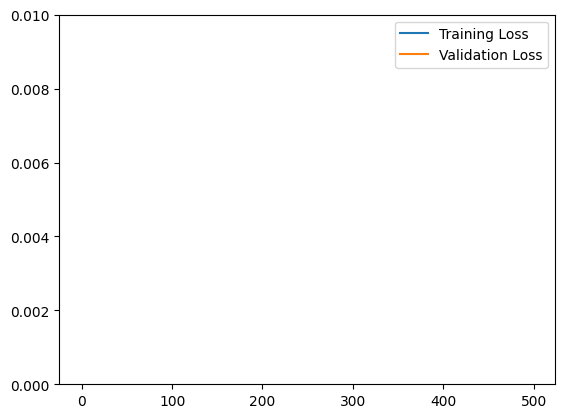

In [7]:
loss = model.evaluate(X_test, y_test)

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.ylim(0, .01)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


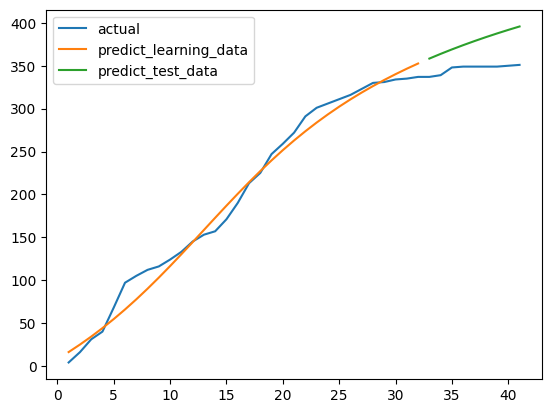

In [8]:
y_pred_lea = model.predict(X_train)
y_pred = model.predict(X_test)

plt.plot(df['testing_date'], df['cum_number_of_fault'], label='actual')
plt.plot(scaler_X.inverse_transform(X_train), scaler_y.inverse_transform(y_pred_lea), label='predict_learning_data')
plt.plot(scaler_X.inverse_transform(X_test), scaler_y.inverse_transform(y_pred), label='predict_test_data')
plt.legend()
plt.show()